<a href="https://colab.research.google.com/github/Marko19907/ML-assignments/blob/main/A2-Distributed-ML/A2_Distributed_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting the data

In [ ]:
# Get the data set

import numpy as np
import keras
from keras.datasets.mnist import load_data

(xtrain, ytrain), (xtest, ytest) = load_data()
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape(len(xtrain), np.prod(xtrain.shape[1:]))
xtest = xtest.reshape(len(xtest), np.prod(xtest.shape[1:]))


print(xtrain.shape)
print(xtest.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


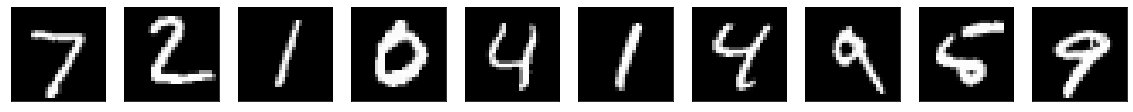

[7 2 1 0 4 1 4 9 5 9]


In [ ]:
# Display some images

import matplotlib.pyplot as plt

n: int = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

print(ytest[0:10])

### Prepare the data and model for training

In [ ]:
# Displays the number in the array[index] position
def displayNumber(array, index: int):
  plt.figure(figsize=(20, 4))

  ax = plt.subplot(2, 1, 1)
  plt.imshow(array[index].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  plt.show()

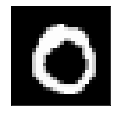

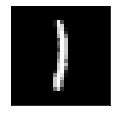

In [ ]:
# Sort the data set by digits

idx = np.argsort(ytrain)
x_train_sorted = xtrain[idx]
y_train_sorted = ytrain[idx]

xzeros = xtrain[ytrain == 0]
xones = xtrain[ytrain == 1]

displayNumber(xzeros, 5)
displayNumber(xones, 10)

In [ ]:
# Divide the data into 3 local sections by digits: 0-2, 3-5, and 6-9

xzeros  = xtrain[ytrain == 0]
xones   = xtrain[ytrain == 1]
xtwos   = xtrain[ytrain == 2]
xthrees = xtrain[ytrain == 3]
xfours  = xtrain[ytrain == 4]
xfives  = xtrain[ytrain == 5]
xsixes  = xtrain[ytrain == 6]
xsevens = xtrain[ytrain == 7]
xeights = xtrain[ytrain == 8]
xnines  = xtrain[ytrain == 9]


xzeroTwos = np.concatenate([xzeros, xones, xtwos])
yzeroTwos = np.concatenate([np.repeat(0, len(xzeros)), np.repeat(1, len(xones)), np.repeat(2, len(xtwos))])

xthreeFives = np.concatenate([xthrees, xfours, xfives])
ythreeFives = np.concatenate([np.repeat(3, len(xthrees)), np.repeat(4, len(xfours)), np.repeat(5, len(xfives))])

xsixNines = np.concatenate([xsixes, xsevens, xeights, xnines])
ysixNines = np.concatenate([np.repeat(6, len(xsixes)), np.repeat(7, len(xsevens)), np.repeat(8, len(xeights)), np.repeat(9, len(xnines))])


print("0-2: ", xzeroTwos.shape, yzeroTwos.shape)
print("3-5: ", xthreeFives.shape, ythreeFives.shape)
print("6-9: ", xsixNines.shape, ysixNines.shape)

0-2:  (18623, 784) (18623,)
3-5:  (17394, 784) (17394,)
6-9:  (23983, 784) (23983,)


In [ ]:
# Shuffle the data

from sklearn.utils import shuffle


xzeroTwos, yzeroTwos = shuffle(xzeroTwos, yzeroTwos, random_state=42)

xthreeFives, ythreeFives = shuffle(xthreeFives, ythreeFives, random_state=42)

xsixNines, ysixNines = shuffle(xsixNines, ysixNines, random_state=42)

In [ ]:
# Split into training (80%) and testing (20%) sets

from sklearn.model_selection import train_test_split

xzeroTwosTrain, xzeroTwosTest, yzeroTwosTrain, yzeroTwosTest = train_test_split(xzeroTwos, yzeroTwos, test_size=0.2, random_state=42)
xthreeFivesTrain, xthreeFivesTest, ythreeFivesTrain, ythreeFivesTest = train_test_split(xthreeFives, ythreeFives, test_size=0.2, random_state=42)
xsixNinesTrain, xsixNinesTest, ysixNinesTrain, ysixNinesTest = train_test_split(xsixNines, ysixNines, test_size=0.2, random_state=42)

### Ensemble Model

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Instantiate the learners (classifiers)
model1 = MLPClassifier(hidden_layer_sizes=(256, 128, 3 ), max_iter=100, activation = 'relu', solver='adam', random_state=42, early_stopping=True, verbose=1)
model2 = MLPClassifier(hidden_layer_sizes=(256, 128, 6 ), max_iter=100, activation = 'relu', solver='adam', random_state=42, early_stopping=True, verbose=1)
model3 = MLPClassifier(hidden_layer_sizes=(512, 256, 10), max_iter=100, activation = 'relu', solver='adam', random_state=42, early_stopping=True, verbose=1)

# Fit classifier with the training data. 
model1.fit(xzeroTwosTrain, yzeroTwosTrain)
model2.fit(xthreeFivesTrain, ythreeFivesTrain)
model3.fit(xsixNinesTrain, ysixNinesTrain)

# Get the base learner predictions
predictions_1 = model1.predict(xzeroTwosTest)
predictions_2 = model2.predict(xthreeFivesTest)
predictions_3 = model3.predict(xsixNinesTest)

# Accuracies of base learners
print('Model 1:', accuracy_score(yzeroTwosTest, predictions_1))
print('Model 2:', accuracy_score(ythreeFivesTest, predictions_2))
print('Model 3:', accuracy_score(ysixNinesTest, predictions_3))

Iteration 1, loss = 0.29014050
Validation score: 0.983221
Iteration 2, loss = 0.10545914
Validation score: 0.987248
Iteration 3, loss = 0.03239594
Validation score: 0.989933
Iteration 4, loss = 0.01770815
Validation score: 0.992617
Iteration 5, loss = 0.01808530
Validation score: 0.994631
Iteration 6, loss = 0.00911322
Validation score: 0.995302
Iteration 7, loss = 0.00707562
Validation score: 0.995973
Iteration 8, loss = 0.02121767
Validation score: 0.993960
Iteration 9, loss = 0.00377787
Validation score: 0.994631
Iteration 10, loss = 0.00194495
Validation score: 0.995302
Iteration 11, loss = 0.00184352
Validation score: 0.995973
Iteration 12, loss = 0.00096447
Validation score: 0.996644
Iteration 13, loss = 0.00070892
Validation score: 0.995973
Iteration 14, loss = 0.00059403
Validation score: 0.995973
Iteration 15, loss = 0.00051251
Validation score: 0.995973
Iteration 16, loss = 0.00044630
Validation score: 0.995973
Iteration 17, loss = 0.00040834
Validation score: 0.995973
Iterat

Iteration 1, loss = 1.34366770
Validation score: 0.804333
Iteration 2, loss = 0.68538518
Validation score: 0.844833
Iteration 3, loss = 0.48636023
Validation score: 0.936667
Iteration 4, loss = 0.30553858
Validation score: 0.942333
Iteration 5, loss = 0.23384903
Validation score: 0.944167
Iteration 6, loss = 0.14843063
Validation score: 0.953000
Iteration 7, loss = 0.09960933
Validation score: 0.953667
Iteration 8, loss = 0.07606515
Validation score: 0.954667
Iteration 9, loss = 0.06108079
Validation score: 0.959333
Iteration 10, loss = 0.04701453
Validation score: 0.957333
Iteration 11, loss = 0.03995422
Validation score: 0.959833
Iteration 12, loss = 0.03229325
Validation score: 0.958833
Iteration 13, loss = 0.02503748
Validation score: 0.961167
Iteration 14, loss = 0.02716271
Validation score: 0.958333
Iteration 15, loss = 0.02117526
Validation score: 0.959833
Iteration 16, loss = 0.02013653
Validation score: 0.955500
Iteration 17, loss = 0.02345349
Validation score: 0.959833
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


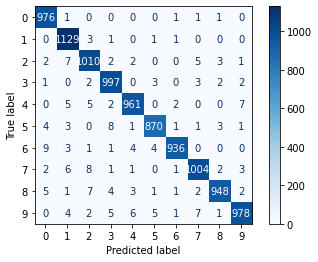

In [ ]:
# Hard voting

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report


classifiers = [
    ('MLP (0-2)', model1),
    ('MLP (3-5)', model2),
    ('MLP (6-9)', model3),
  ]
voting_hard_classifier = VotingClassifier(estimators = classifiers, voting='hard', weights=[1,1,1])


# Fit classifier with the training data
voting_hard_classifier.fit(xtrain, ytrain)

# Predict the most voted class (most probable class)
hard_predictions = voting_hard_classifier.predict(xtest)

# Evaluate both models
print('-'*30)
print('Hard voting:', accuracy_score(ytest, hard_predictions))

plot_confusion_matrix(voting_hard_classifier, xtest, ytest, cmap=plt.cm.Blues)
plt.show()

Iteration 1, loss = 1.34366770
Validation score: 0.804333
Iteration 2, loss = 0.68538518
Validation score: 0.844833
Iteration 3, loss = 0.48636023
Validation score: 0.936667
Iteration 4, loss = 0.30553858
Validation score: 0.942333
Iteration 5, loss = 0.23384903
Validation score: 0.944167
Iteration 6, loss = 0.14843063
Validation score: 0.953000
Iteration 7, loss = 0.09960933
Validation score: 0.953667
Iteration 8, loss = 0.07606515
Validation score: 0.954667
Iteration 9, loss = 0.06108079
Validation score: 0.959333
Iteration 10, loss = 0.04701453
Validation score: 0.957333
Iteration 11, loss = 0.03995422
Validation score: 0.959833
Iteration 12, loss = 0.03229325
Validation score: 0.958833
Iteration 13, loss = 0.02503748
Validation score: 0.961167
Iteration 14, loss = 0.02716271
Validation score: 0.958333
Iteration 15, loss = 0.02117526
Validation score: 0.959833
Iteration 16, loss = 0.02013653
Validation score: 0.955500
Iteration 17, loss = 0.02345349
Validation score: 0.959833
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


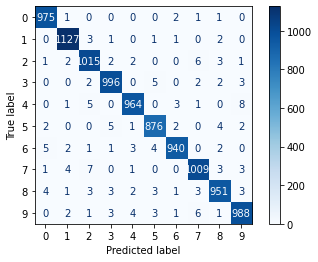

In [ ]:
# Soft voting

classifiers = [
    ('MLP (0-2)', model1),
    ('MLP (3-5)', model2),
    ('MLP (6-9)', model3),
  ]
voting_soft_classifier = VotingClassifier(estimators = classifiers, voting='soft', weights=[1,1,1])

voting_soft_classifier.fit(xtrain, ytrain)

soft_predictions = voting_soft_classifier.predict(xtest)

print('Soft voting:', accuracy_score(ytest, soft_predictions))

confusion_matrix(ytest, soft_predictions)
print(classification_report(ytest, soft_predictions))

plot_confusion_matrix(voting_soft_classifier, xtest, ytest, cmap=plt.cm.Blues)
plt.show()

### Monolithic model (trained on the whole data set)

In [ ]:
from tensorflow import keras
from keras.callbacks import EarlyStopping

model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(28*28, )),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)

model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the monolithic model

epochs: int = 7
history = model.fit(xtrain, ytrain, epochs=epochs, validation_split=0.1, batch_size=64, shuffle=True, verbose=1, callbacks=[es])

Epoch 1/7
844/844 [==============================] - 6s 4ms/step - loss: 0.2899 - accuracy: 0.9128 - val_loss: 0.1082 - val_accuracy: 0.9672
Epoch 2/7
844/844 [==============================] - 3s 4ms/step - loss: 0.1526 - accuracy: 0.9549 - val_loss: 0.0869 - val_accuracy: 0.9745
Epoch 3/7
844/844 [==============================] - 3s 4ms/step - loss: 0.1248 - accuracy: 0.9643 - val_loss: 0.0879 - val_accuracy: 0.9762
Epoch 4/7
844/844 [==============================] - 3s 4ms/step - loss: 0.1093 - accuracy: 0.9694 - val_loss: 0.0776 - val_accuracy: 0.9797
Epoch 5/7
844/844 [==============================] - 3s 4ms/step - loss: 0.0996 - accuracy: 0.9719 - val_loss: 0.0782 - val_accuracy: 0.9805
Epoch 6/7
844/844 [==============================] - 3s 4ms/step - loss: 0.0942 - accuracy: 0.9741 - val_loss: 0.0715 - val_accuracy: 0.9818
Epoch 7/7
844/844 [==============================] - 3s 4ms/step - loss: 0.0882 - accuracy: 0.9762 - val_loss: 0.0913 - val_accuracy: 0.9785


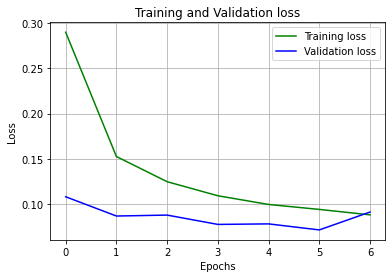

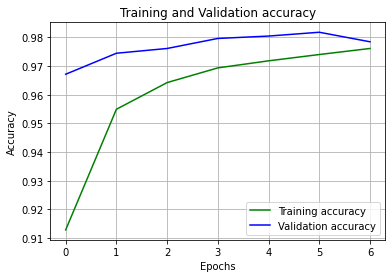

313/313 [==============================] - 1s 3ms/step - loss: 0.0864 - accuracy: 0.9786
Test loss    : 0.08637051284313202
Test accuracy: 0.978600025177002


In [ ]:
# Plot the loss and accuracy

if (es.stopped_epoch != 0): # So that plotting does not fail if EarlyStopping is triggered
  epochs: int = es.stopped_epoch + 1

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochsList = range(0, epochs)
plt.plot(epochsList, train_loss, 'g', label='Training loss')
plt.plot(epochsList, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochsList, train_acc, 'g', label='Training accuracy')
plt.plot(epochsList, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


test_loss, test_acc = model.evaluate(xtest, ytest)
print('Test loss    :', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step
Precision score: 0.9789217339711422
Recall score   : 0.9783795117669587
1875/1875 [==============================] - 3s 2ms/step


<Figure size 432x288 with 0 Axes>

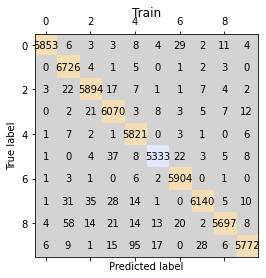

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

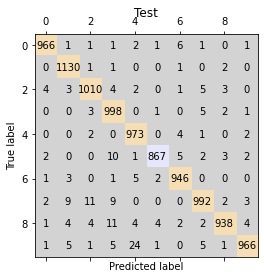

In [ ]:
# Confusion matrix as text

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from matplotlib.colors import ListedColormap

predict_x = model.predict(xtest)
keras_pred = np.argmax(predict_x, axis=1)

print('Precision score:', precision_score(ytest, keras_pred, average='macro'))
print('Recall score   :', recall_score(ytest, keras_pred, average='macro'))


cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])

# Confusion matrix
def cm(ytest, ypred, title):
  cm = confusion_matrix(ytest, ypred)

  plt.figure()
  plt.matshow(cm, cmap=cmap)
  
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
  plt.title(title)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

cm(ytrain, model.predict(xtrain).argmax(1), title='Train')
cm(ytest, model.predict(xtest).argmax(1), title='Test')

### Monolithic vs ensemble, conclusion 

In [ ]:
from sklearn.metrics import accuracy_score


print('Ensemble, hard voting    :', accuracy_score(ytest, hard_predictions))

print('Ensemble, soft voting    :', accuracy_score(ytest, soft_predictions))

val_pred = np.argmax(model.predict(xtest), axis=-1)
print('Monolithic model accuracy:', accuracy_score(ytest, val_pred))

Ensemble, hard voting    : 0.9809
Ensemble, soft voting    : 0.9841
313/313 [==============================] - 1s 2ms/step
Monolithic model accuracy: 0.9786
